## 평가 지표 및 측정

### 최종 목표를 기억하라
- 응용의 고차원적 목표인 비즈니스 지표
- 어떤 머신러닝 응용에서 특정 알고리즘을 선택하여 나타난 결과 => 비즈니스 임팩트
### 이진 분류의 평가 지표
- 에러의 종류
    - 암 진단 사례에서 양성(암), 음성(건강) 테스느 시에 거짓 양성(false positive)와 거짓음성(false negative) 오류 고려
    - 거짓 음성은 최대한 피해야 하며, 거짓 양성은 중요도가 낮음
- 불균형 데이터 셋
    - 두 종류의 오류(거짓 양성과 거짓 음성) 중 하나가 다른 것보다 많을 때 더 중요

###### 불균형 데이터셋

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y,random_state=0)

In [3]:
# most_frequent : 최빈값
# 9가 아님을 예측값으로 내놓은 DummyClassifier을 사용하여 정확도를 계산
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:",np.unique(pred_most_frequent))
print("테스트 점수:{:.2f}".format(dummy_majority.score(X_test,y_test)))

# 거의 아무것도 학습하지 않았는데 90%의 정확도
# 문제에 따라 그저 한 클래스를 예측하기만 해도 될 때도 있음

예측된 레이블의 고유값: [False]
테스트 점수:0.90


In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수 :{:.2f}".format(tree.score(X_test,y_test)))

# 정확도로만 보면 DecisionTreeClassifier가 DummyClssifier 보다 낫다

테스트 점수 :0.92


In [5]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수 :{:.2f}".format(dummy.score(X_test,y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logred 점수:{:.2f}".format(logreg.score(X_test,y_test)))



dummy 점수 :0.90
logred 점수:0.98


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


무작위로 예측하는 DummyClssifier은 결과가 좋지 않음
> imbalanced datasets에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문에 발생하는 현상

###### 오차 행렬(Confusion matrices)
- 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법

In [7]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n",confusion)
print(443/450)
# (맞힌 갯수)/(전체 갯수)
# logreg 점수 : 0.98

오차 행렬:
 [[402   1]
 [  6  41]]
0.9844444444444445


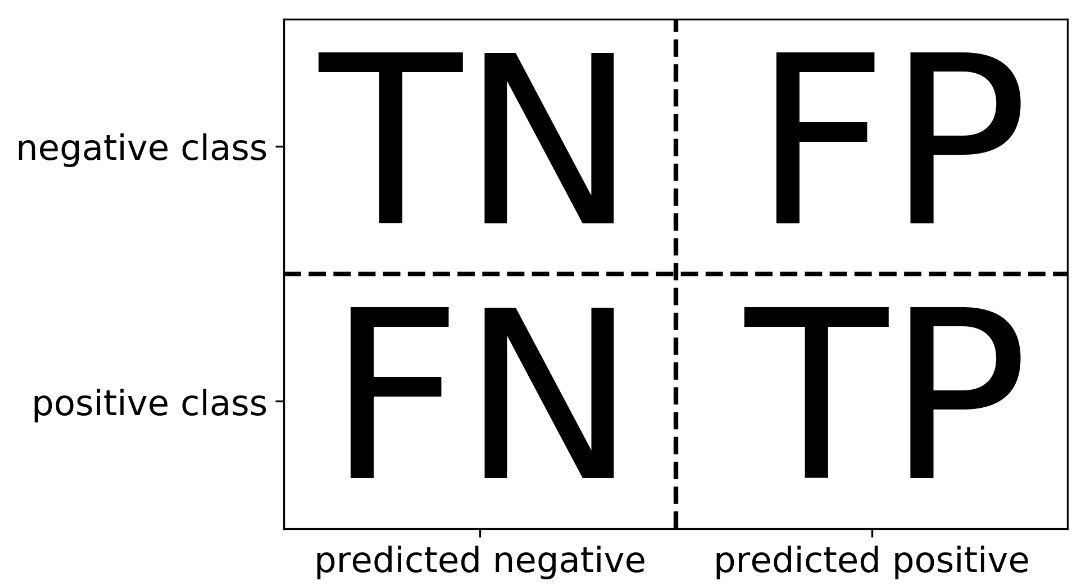

- TP(true positive) : 맞는 것을 올바르게 예측한 것
- TN(true negative) : 틀린 것을 올바르게 예측한 것
- FP(false positive) : 틀린것을 맞다고 잘못 예측한 것
- FN(false negative) : 맞는 것을 틀렸다고 잘못 예측한 것

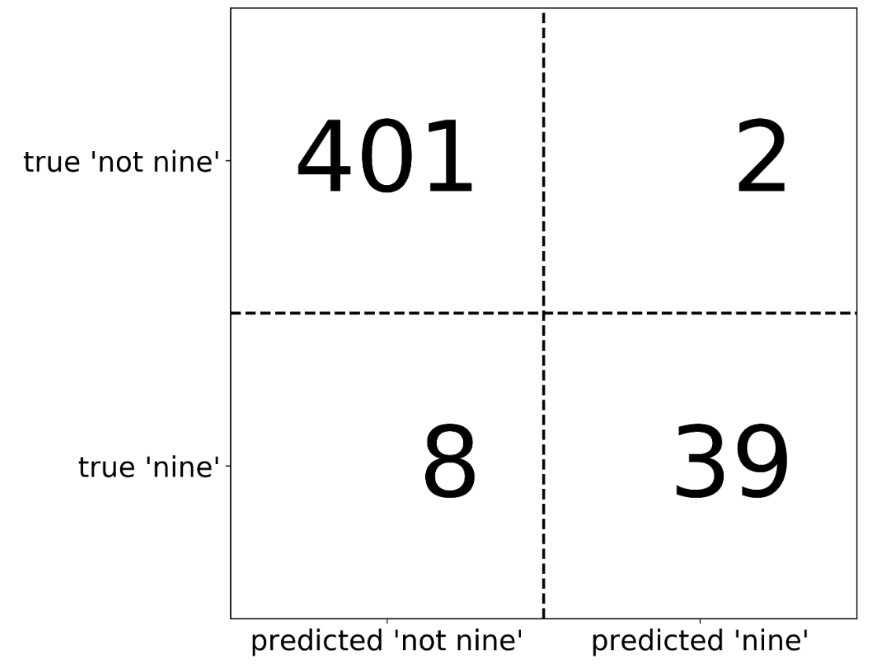

In [10]:
print("빈도 기반 데미 모델:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\n결정 트리:")
print(confusion_matrix(y_test,pred_tree))
print("\n로지스틱 회귀:")
print(confusion_matrix(y_test,pred_logreg))

빈도 기반 데미 모델:
[[403   0]
 [ 47   0]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[402   1]
 [  6  41]]


## 모델 성능 평가
#### 1. Accuracy
- 가장 많이 쓰임
- 모든 tp를 전부 더하고 전체 개수로 나눈 것
#### 2. 정밀도
- TP / (TP + FP)
#### 3. 재현율(Recall)
- TP/(TP+FN)
#### 4. F1 score
- 데이터가 unbalanced 할 때 잘 예측함
- 정밀도도 중요하고 재현율도 중요하니, 이 두값의 조화평균을 내서 수치로 나타낸 지표

###### 정확도와의 관계
* 정확히 예측한 수 TP + TN 을 전체 샘플 수로 나눈 것이다.
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}
###### 정밀도, 재현율, f-점수
* 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 **정밀도(precision)과 재현율(recall)** 이다.
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}
<br>
* **재현율**은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용한다. 즉 거짓 음성(FN)을 피하는 것이 중요할 때다. 재현율을 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 한다.
\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
<br>

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}
<br>
* 정밀도와 재현율의 조화 평균인 **f-점수(f-score) 또는 f-측정(f-measure)** 은 이 둘을 하나로 요약해준다. 특별히 이 공식을 f1-점수라고도 한다. 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 낫다. 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는 게 단점이다.

In [12]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score:{:.2f}".format(
    f1_score(y_test,pred_most_frequent)))
print("트리 모델의 f1 score:{:.2f}".format(f1_score(y_test,pred_tree)))
print("로지스틱 회귀 모델의 f1 score:{:.2f}".format(
    f1_score(y_test,pred_logreg)))

빈도 기반 더미 모델의 f1 score:0.00
트리 모델의 f1 score:0.55
로지스틱 회귀 모델의 f1 score:0.92


### 정밀도와 재현율의 맹점
#### 1. 정밀도를 100%로 만드는 방법
- 확실한 기준이 되는 경우만 positive로 예측하고 나머지는 모두 negative로 예측
- 



#### 2. 재현율을 100%로 만드는 방법
- 모든 경우를 positive로 예측

### 정밀도-재현율 곡선
- 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정
- 양성 샘플의 실수(FN)을 10% 보다 작게 하여 90% 이상의 재현율
    - 임계값은 비즈니스 목표에 따라 결정됨- 운영 포인트
    - 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만들어야 함
- 정밀도-재현율 곡선을 그려 정밀도와 재현율의 모든 점을 살펴봄

### ROC 곡선과 AUC
- ROC(Receiver-Operation Characteristic curve, 수신자 조작 특성 곡선)과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중욧하게 사용되는 지표
- 민감도와 특이도가 서로 어떤 관계를 가지며 변화하는지 2차원 평면상에 표현
- ROC Curve가 그려지는 곡선을 의미하고, AUC(Area Under Curve)는 ROC Curve의 면적
    - AUC가 1에 가까울 수록 좋은 모델

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,target_names=["9아님","9"]))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 다중 분류의 평가 지표


### 회귀의 평가지표
- 분류와 비슷하게 사용 가능
    - 타겟을 과대 예측한 것 대비 과소 예측한 것 분석
- 대부분의 응용은 score 메소드의 R2 계산으로 충분
- 평균 제곱 에러 또는 평균 절댓값 에러를 사용하여 비즈니스 결정
### 모델 선택에서 평가지표 사용하기
#### Scoring 매개변수 옵션
- accuracy: 정확도, 기본값
- roc_auc : ROC 곡선의 아래 면적
- average_recision : 정밀도-재현율 곡선의 아래 면적
- f1_macro, f1_weighted, f1_micro - F1 점수의 가중치 방식
- R2 : 회귀에서 널리 사용하는 R2 점수
- mean_squared_error / mean_absolute_error : 평균제곱/ 절댓값오차